<h2>Identification of Non-Responsive Pixels</h2>

In [1]:
#Load libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load image
img_loc = (r"C:\Users\A8DPDZZ\Documents\Test Development\ImgAnalysis\samplePix.jpg")
img = cv2.imread(img_loc)
print("ImgSize and Type:", img.size, img.dtype) #check image information

ImgSize and Type: 4300800 uint8


<H2>Image Preparation Section</h2>

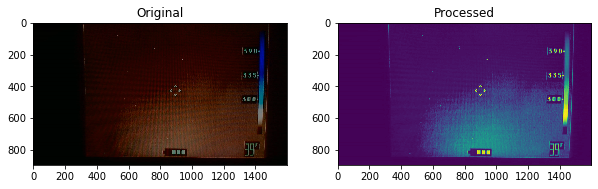

In [3]:
#Image Prep
img_gry = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blr = cv2.GaussianBlur(img_gry,(5,5),0)

f, ax = plt.subplots(2,2,figsize=(10,7))
plt.subplot(121),plt.imshow(img),plt.title('Original')
#plt.xticks([]), plt.yticks([]) #remove ticks if necessary
plt.subplot(122),plt.imshow(img_blr),plt.title('Processed')
#plt.xticks([]), plt.yticks([]) #remove ticks if necessary
plt.show()

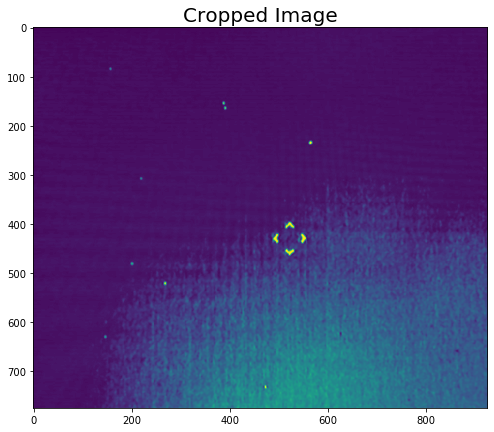

In [4]:
cr_roi = img_blr[0:775, 375:1300]
f, ax = plt.subplots(1,1,figsize=(10,7))
plt.title('Cropped Image', fontdict=None, loc='center', pad=None, fontsize = 20)
plt.imshow(cr_roi) #plot last image with all points

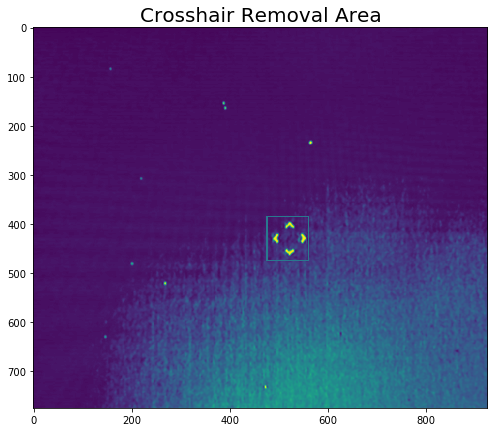

In [5]:
#Create 0 values to crosshairs area
cv2.rectangle(cr_roi, (475, 385), (560, 475), (50, 50, 50), 2) #Draw bounding area for crosshair extraction
f, ax = plt.subplots(1,1,figsize=(10,7))
plt.title('Crosshair Removal Area', fontdict=None, loc='center', pad=None, fontsize = 20)
plt.imshow(cr_roi) #plot last image with all points

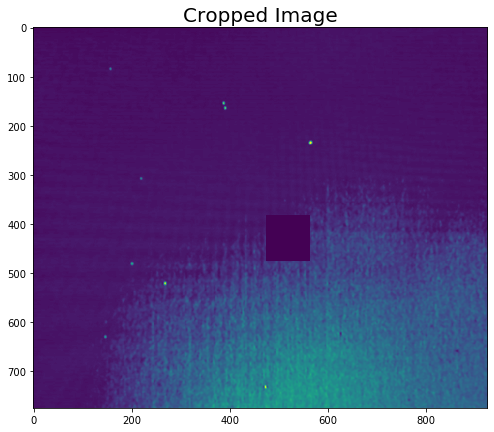

In [6]:
#Set determined crosshair area to 0 
cr_roi[383:477,473:563] = 0
f, ax = plt.subplots(1,1,figsize=(10,7))
plt.title('Cropped Image', fontdict=None, loc='center', pad=None, fontsize = 20)
plt.imshow(cr_roi) #plot last image with all points

In [7]:
#Checks image for max and min pixel values
print("Greatest pixel value:",np.ndarray.max(cr_roi),"Least pixel value:",np.ndarray.min(cr_roi))

Greatest pixel value: 123 Least pixel value: 0


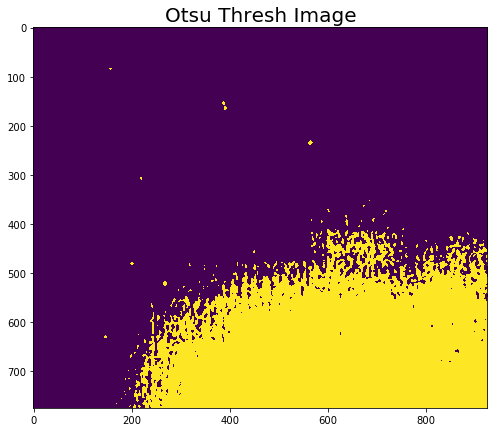

In [9]:
ret,imgO = cv2.threshold(cr_roi,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
f, ax = plt.subplots(1,1,figsize=(10,7))
plt.title('Otsu Thresh Image', fontdict=None, loc='center', pad=None, fontsize = 20)
plt.imshow(imgO) #plot last image with all points

In [10]:
#Select the whether min or max for dead pixels depending on the thermal target
thresh = np.ndarray.max(imgO)
locat = np.where(imgO >= thresh)

print(locat, np.count_nonzero(locat))

(array([ 83,  83,  83, ..., 774, 774, 774], dtype=int64), array([156, 157, 158, ..., 922, 923, 924], dtype=int64)) 366054


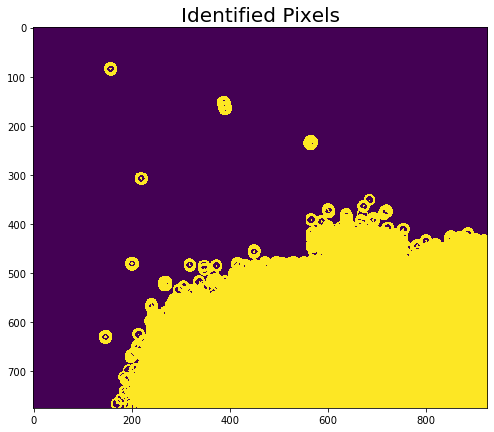

In [11]:
#Locates NR pixel on image
rad = 10
for pt in zip(*locat[::-1]): 
    cv2.circle(imgO, pt, rad, (255,255,255),2)
f, ax = plt.subplots(1,1,figsize=(10,7))
plt.title('Identified Pixels', fontdict=None, loc='center', pad=None, fontsize = 20)
plt.imshow(imgO) #plot last image with all points

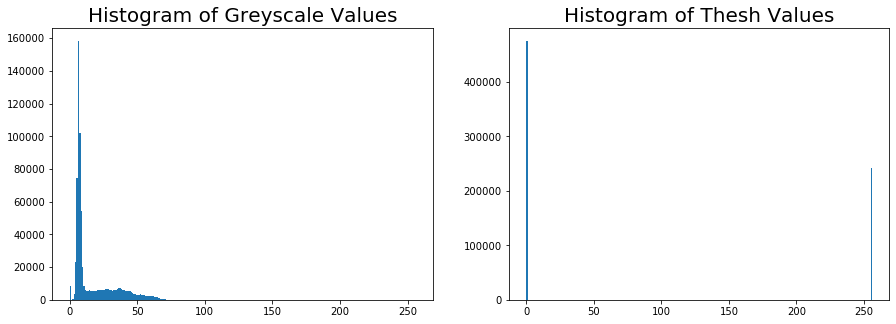

In [12]:
f, ax = plt.subplots(2,2,figsize=(15,5))
plt.subplot(121),plt.hist(cr_roi.ravel(),256,[0,256]),plt.title('Histogram of Greyscale Values',
                                                               fontdict=None,
                                                               loc='center',
                                                               pad=None,
                                                               fontsize=20)
plt.subplot(122),plt.hist(imgO.ravel(),256,[0,256]),plt.title('Histogram of Thesh Values',
                                                               fontdict=None,
                                                               loc='center',
                                                               pad=None,
                                                               fontsize=20)
plt.show()